In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import re

%matplotlib inline

In [110]:
def parse_times(file):
    with open(file) as f:
        lines = f.readlines()
        time_dict = dict()
        time_dict["real"] = float(lines[1].split("\t")[1].split("m")[0]) * 60 + float(lines[1].split("\t")[1].split("m")[1].split("s")[0])
        time_dict["user"] = float(lines[2].split("\t")[1].split("m")[0]) * 60 + float(lines[2].split("\t")[1].split("m")[1].split("s")[0])
        time_dict["sys"] = float(lines[3].split("\t")[1].split("m")[0]) * 60 + float(lines[3].split("\t")[1].split("m")[1].split("s")[0])
        return time_dict

In [111]:
times = {
    "baseline": {
        1: [],
        2: [],
        4: [],
        8: [],
        16: []
    },
    "stat": {
        1: [],
        2: [],
        4: [],
        8: [],
        16: []
    },
    "record": {
        1: [],
        2: [],
        4: [],
        8: [],
        16: []
    }
}
for file in os.listdir("time_out"):
    if file.startswith("perf_stat"):
        [threads] = re.findall(r"\d+\b", file)
        times["stat"][int(threads)].append(parse_times("time_out/" + file))
    if file.startswith("perf_record"):
        [threads] = re.findall(r"\d+\b", file)
        times["record"][int(threads)].append(parse_times("time_out/" + file))
    if file.startswith("baseline"):
        [threads] = re.findall(r"\d+\b", file)
        times["baseline"][int(threads)].append(parse_times("time_out/" + file))

In [112]:
times

{'baseline': {1: [{'real': 24.569, 'user': 22.012, 'sys': 6.126},
   {'real': 23.862, 'user': 21.551, 'sys': 5.847},
   {'real': 25.284, 'user': 22.544, 'sys': 6.32},
   {'real': 25.033, 'user': 22.386, 'sys': 6.249},
   {'real': 24.399, 'user': 21.627, 'sys': 6.218},
   {'real': 12.374, 'user': 11.871, 'sys': 3.1},
   {'real': 26.795, 'user': 24.254, 'sys': 6.279},
   {'real': 24.868, 'user': 22.441, 'sys': 6.012},
   {'real': 12.023, 'user': 11.53, 'sys': 3.044},
   {'real': 12.052, 'user': 10.822, 'sys': 2.937}],
  2: [{'real': 18.31, 'user': 31.1, 'sys': 9.235},
   {'real': 16.45, 'user': 26.748, 'sys': 9.316},
   {'real': 17.722, 'user': 29.806, 'sys': 8.758},
   {'real': 14.853, 'user': 23.481, 'sys': 8.046},
   {'real': 16.759, 'user': 26.795, 'sys': 9.385},
   {'real': 16.759, 'user': 28.136, 'sys': 8.994},
   {'real': 17.895, 'user': 30.014, 'sys': 8.949},
   {'real': 18.033, 'user': 30.063, 'sys': 8.601},
   {'real': 18.08, 'user': 30.953, 'sys': 8.921},
   {'real': 17.417, '

In [113]:
times_real = dict()
for top_key in times.keys():
    times_real[top_key] = dict()
    for thread_key in times[top_key].keys():
        times_real[top_key][thread_key] = dict()
        times_real[top_key][thread_key]["mean"] = np.mean([x["real"] for x in times[top_key][thread_key]])
        times_real[top_key][thread_key]["std"] = np.std([x["real"] for x in times[top_key][thread_key]])

In [126]:
baseline_means = [x["mean"] for x in times_real["baseline"].values()][:-1]
baseline_std = [x["std"] for x in times_real["baseline"].values()][:-1]
stat_means = [x["mean"] for x in times_real["stat"].values()][:-1]
stat_std = [x["std"] for x in times_real["stat"].values()][:-1]
record_means = [x["mean"] for x in times_real["record"].values()][:-1]
record_std = [x["std"] for x in times_real["record"].values()][:-1]

In [127]:
len(baseline_means)

4

Text(0, 0.5, 'Real time (s)')

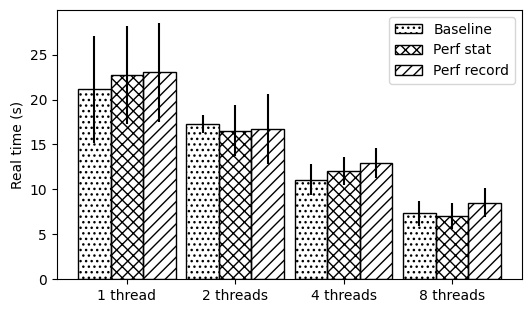

In [128]:
labels = ["1 thread", "2 threads", "4 threads", "8 threads"]

fig, ax = plt.subplots(figsize=(6,3.5))
x = np.arange(len(labels))
width = 0.3

ax.bar(x - width, baseline_means, width, yerr=baseline_std, hatch="...", fill=None, label="Baseline")
ax.bar(x, stat_means, width, yerr=stat_std, hatch="xxx", fill=None, label="Perf stat")
ax.bar(x + width, record_means, width, yerr=record_std, hatch="///", fill=None, label="Perf record")
    
ax.legend()
ax.set_xticks(x, labels)
ax.set_ylabel("Real time (s)")

In [116]:
times_system = dict()
for top_key in times.keys():
    times_system[top_key] = dict()
    for thread_key in times[top_key].keys():
        times_system[top_key][thread_key] = dict()
        times_system[top_key][thread_key]["mean"] = np.mean([x["sys"] for x in times[top_key][thread_key]])
        times_system[top_key][thread_key]["std"] = np.std([x["sys"] for x in times[top_key][thread_key]])

In [117]:
baseline_means_sys = [x["mean"] for x in times_system["baseline"].values()]
baseline_std_sys = [x["std"] for x in times_system["baseline"].values()]
stat_means_sys = [x["mean"] for x in times_system["stat"].values()]
stat_std_sys = [x["std"] for x in times_system["stat"].values()]
record_means_sys = [x["mean"] for x in times_system["record"].values()]
record_std_sys = [x["std"] for x in times_system["record"].values()]

(0.0, 100.0)

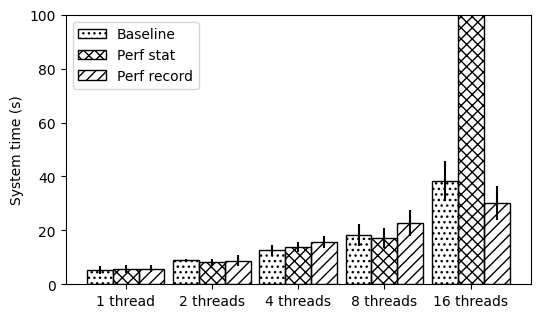

In [120]:
labels = ["1 thread", "2 threads", "4 threads", "8 threads", "16 threads"]

fig, ax = plt.subplots(figsize=(6,3.5))
x = np.arange(len(labels))
width = 0.3

ax.bar(x - width, baseline_means_sys, width, yerr=baseline_std_sys, hatch="...", fill=None, label="Baseline")
ax.bar(x, stat_means_sys, width, yerr=stat_std_sys, hatch="xxx", fill=None, label="Perf stat")
ax.bar(x + width, record_means_sys, width, yerr=record_std_sys, hatch="///", fill=None, label="Perf record")
    
ax.legend()
ax.set_xticks(x, labels)
ax.set_ylabel("System time (s)")
ax.set_ylim(0,100)

In [121]:
times_user = dict()
for top_key in times.keys():
    times_user[top_key] = dict()
    for thread_key in times[top_key].keys():
        times_user[top_key][thread_key] = dict()
        times_user[top_key][thread_key]["mean"] = np.mean([x["user"] for x in times[top_key][thread_key]])
        times_user[top_key][thread_key]["std"] = np.std([x["user"] for x in times[top_key][thread_key]])

In [122]:
baseline_means_user = [x["mean"] for x in times_user["baseline"].values()]
baseline_std_user = [x["std"] for x in times_user["baseline"].values()]
stat_means_user = [x["mean"] for x in times_user["stat"].values()]
stat_std_user = [x["std"] for x in times_user["stat"].values()]
record_means_user = [x["mean"] for x in times_user["record"].values()]
record_std_user = [x["std"] for x in times_user["record"].values()]

(0.0, 100.0)

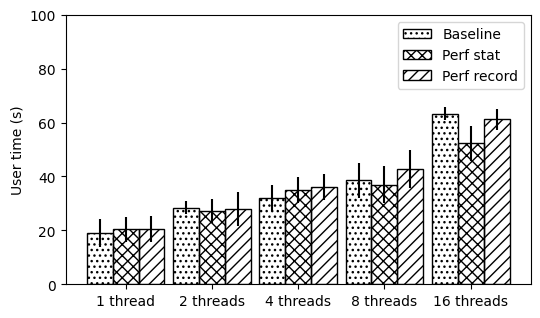

In [123]:
labels = ["1 thread", "2 threads", "4 threads", "8 threads", "16 threads"]

fig, ax = plt.subplots(figsize=(6,3.5))
x = np.arange(len(labels))
width = 0.3

ax.bar(x - width, baseline_means_user, width, yerr=baseline_std_user, hatch="...", fill=None, label="Baseline")
ax.bar(x, stat_means_user, width, yerr=stat_std_user, hatch="xxx", fill=None, label="Perf stat")
ax.bar(x + width, record_means_user, width, yerr=record_std_user, hatch="///", fill=None, label="Perf record")
    
ax.legend()
ax.set_xticks(x, labels)
ax.set_ylabel("User time (s)")
ax.set_ylim(0,100)